In [1]:
import mne
import h5py
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from tools import * # stuff from this project
from ridge import * # ridge pkg
from utils import * # utils from ridge

/Users/maansidesai/anaconda3/envs/mne/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/maansidesai/anaconda3/envs/mne/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## Load data

In [2]:
user = 'maansi'
if user == 'maansi':
    data_dir = '/Users/maansidesai/Box/hamilton_lab_data/trailers_timit' #change this path
elif user == 'garret':
    data_dir = '/home/kfsh/data/trailers_timit'

subject='MT0002'
stimulus_class = 'TIMIT'

#load stim and resp 
resp_dict, stim_dict = loadEEGh5(subject, stimulus_class, data_dir,
          eeg_epochs=True, resp_mean = True, binarymat=False, binaryfeatmat = True, envelope=False, pitch=False, gabor_pc10=False, 
          spectrogram=False, binned_pitches=False, spectrogram_scaled=False, scene_cut=False)


TIMIT
['fadg0_si1279.wav', 'faem0_si2022.wav', 'falr0_si1955.wav', 'fbcg1_si1612.wav', 'fbjl0_si2182.wav', 'fbmh0_si1766.wav', 'fbmj0_si815.wav', 'fcag0_si1503.wav', 'fcag0_si1641.wav', 'fcaj0_si1479.wav', 'fcaj0_si1804.wav', 'fceg0_si1878.wav', 'fceg0_si618.wav', 'fcft0_si1808.wav', 'fcft0_si548.wav', 'fcjs0_si1607.wav', 'fcmh0_si2084.wav', 'fcmh1_si1493.wav', 'fcmr0_si1735.wav', 'fcmr0_si475.wav', 'fcrh0_si1718.wav', 'fcrz0_si2053.wav', 'fdas1_si2091.wav', 'fdaw0_si1406.wav', 'fdfb0_si1948.wav', 'fdhc0_si2189.wav', 'fdjh0_si1565.wav', 'fdml0_si2075.wav', 'fdms0_si1218.wav', 'fdrd1_si1544.wav', 'fdrw0_si1423.wav', 'fdxw0_si1511.wav', 'fdxw0_si2141.wav', 'feac0_si1245.wav', 'fear0_si1882.wav', 'fedw0_si1653.wav', 'fetb0_si1148.wav', 'fgcs0_si856.wav', 'fgjd0_si1179.wav', 'fgmd0_si2107.wav', 'fgrw0_si1990.wav', 'fhlm0_si1560.wav', 'fisb0_si2209.wav', 'fjas0_si2030.wav', 'fjhk0_si1652.wav', 'fjkl0_si1562.wav', 'fjkl0_si2192.wav', 'fjlg0_si1506.wav', 'fjlg0_si2306.wav', 'fjlr0_si1861.wav'

phnfeatmat shape is:
(14, 218)
taking the mean across repeats
(64, 218)
fcrz0_si2053.wav
phnfeatmat shape is:
(14, 325)
taking the mean across repeats
(64, 325)
fdas1_si2091.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
fdaw0_si1406.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
fdfb0_si1948.wav
phnfeatmat shape is:
(14, 206)
taking the mean across repeats
(64, 206)
fdhc0_si2189.wav
phnfeatmat shape is:
(14, 289)
taking the mean across repeats
(64, 289)
fdjh0_si1565.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
fdml0_si2075.wav
phnfeatmat shape is:
(14, 206)
taking the mean across repeats
(64, 206)
fdms0_si1218.wav
phnfeatmat shape is:
(14, 331)
taking the mean across repeats
(64, 331)
fdrd1_si1544.wav
phnfeatmat shape is:
(14, 332)
taking the mean across repeats
(64, 332)
fdrw0_si1423.wav
phnfeatmat shape is:
(14, 308)
taking the mean across repeats
(64, 308)
fdxw0_si1511.wav
phnfeatmat shape is:


phnfeatmat shape is:
(14, 315)
taking the mean across repeats
(64, 315)
mafm0_si2199.wav
phnfeatmat shape is:
(14, 143)
taking the mean across repeats
(64, 143)
majc0_si2095.wav
phnfeatmat shape is:
(14, 318)
taking the mean across repeats
(64, 318)
makr0_si1352.wav
phnfeatmat shape is:
(14, 278)
taking the mean across repeats
(64, 278)
makr0_si722.wav
phnfeatmat shape is:
(14, 264)
taking the mean across repeats
(64, 264)
marc0_si1188.wav
phnfeatmat shape is:
(14, 184)
taking the mean across repeats
(64, 184)
marc0_si1818.wav
phnfeatmat shape is:
(14, 281)
taking the mean across repeats
(64, 281)
marw0_si646.wav
phnfeatmat shape is:
(14, 310)
taking the mean across repeats
(64, 310)
mbbr0_si1685.wav
phnfeatmat shape is:
(14, 325)
taking the mean across repeats
(64, 325)
mbbr0_si2315.wav
phnfeatmat shape is:
(14, 248)
taking the mean across repeats
(64, 248)
mbjk0_si545.wav
phnfeatmat shape is:
(14, 259)
taking the mean across repeats
(64, 259)
mbjv0_si1877.wav
phnfeatmat shape is:
(14

phnfeatmat shape is:
(14, 299)
taking the mean across repeats
(64, 299)
mhrm0_si1475.wav
phnfeatmat shape is:
(14, 222)
taking the mean across repeats
(64, 222)
milb0_si2163.wav
phnfeatmat shape is:
(14, 318)
taking the mean across repeats
(64, 318)
mjae0_si2154.wav
phnfeatmat shape is:
(14, 296)
taking the mean across repeats
(64, 296)
mjar0_si2247.wav
phnfeatmat shape is:
(14, 175)
taking the mean across repeats
(64, 175)
mjbg0_si1724.wav
phnfeatmat shape is:
(14, 216)
taking the mean across repeats
(64, 216)
mjda0_si1661.wav
phnfeatmat shape is:
(14, 302)
taking the mean across repeats
(64, 302)
mjdc0_si1161.wav
phnfeatmat shape is:
(14, 295)
taking the mean across repeats
(64, 295)
mjdc0_si2165.wav
phnfeatmat shape is:
(14, 237)
taking the mean across repeats
(64, 237)
mjdg0_si1705.wav
phnfeatmat shape is:
(14, 288)
taking the mean across repeats
(64, 288)
mjdh0_si1984.wav
phnfeatmat shape is:
(14, 172)
taking the mean across repeats
(64, 172)
mjdm0_si1937.wav
phnfeatmat shape is:


(64, 261)
mrgg0_si569.wav
phnfeatmat shape is:
(14, 322)
taking the mean across repeats
(64, 322)
mrgs0_si1986.wav
phnfeatmat shape is:
(14, 192)
taking the mean across repeats
(64, 192)
mrjh0_si914.wav
phnfeatmat shape is:
(14, 271)
taking the mean across repeats
(64, 271)
mrjm0_si1095.wav
phnfeatmat shape is:
(14, 278)
taking the mean across repeats
(64, 278)
mrjm4_si1489.wav
phnfeatmat shape is:
(14, 244)
taking the mean across repeats
(64, 244)
mrjm4_si2119.wav
phnfeatmat shape is:
(14, 286)
taking the mean across repeats
(64, 286)
mrjo0_si1624.wav
phnfeatmat shape is:
(14, 209)
taking the mean across repeats
(64, 209)
mrjs0_si1523.wav
phnfeatmat shape is:
(14, 146)
taking the mean across repeats
(64, 146)
mrjt0_si1805.wav
phnfeatmat shape is:
(14, 211)
taking the mean across repeats
(64, 211)
mrld0_si2224.wav
phnfeatmat shape is:
(14, 287)
taking the mean across repeats
(64, 287)
mrlj0_si2050.wav
phnfeatmat shape is:
(14, 245)
taking the mean across repeats
(64, 245)
mrms0_si2100.

In [29]:
#load weights from encoding model - from training set (370 sentences)
# Feats x delays x chans
# These weights do not include the test set!
f = h5py.File('%s/%s_STRF_by_phnfeat_%s.hf5' %(data_dir, subject, stimulus_class))
weights = f['wts_%s' %(stimulus_class.lower())][:]
#corrs = f['corrs_%s' %(stimulus_class.lower())][:]
p_vals = f['pvals_%s' %(stimulus_class.lower())][:]
sig_weights = weights[np.where(p_vals[0] < 0.05)]
print(weights.shape)
reshaped_wts = weights.reshape(-1,14,weights.shape[1])
print(reshaped_wts.shape)

print('Printing length of significant correlations')
print(len(sig_weights))

(1078, 64)
(77, 14, 64)
Printing length of significant correlations
51


In [8]:
# Get resp set (10 timit sentences)
test_set = ['fcaj0_si1479.wav', 'fcaj0_si1804.wav', 'fdfb0_si1948.wav', 
    'fdxw0_si2141.wav', 'fisb0_si2209.wav', 'mbbr0_si2315.wav', 
    'mdlc2_si2244.wav', 'mdls0_si998.wav', 'mjdh0_si1984.wav', 
    'mjmm0_si625.wav']
vResp = np.hstack([resp_dict[r][0] for r in test_set]).T
print(vResp.shape) # timepoints x chans

(2134, 64)


In [9]:
# Make delays
delay_min, delay_max = 0.,0.6
wt_pad = 0.
fs = 128.
delays = np.arange(np.floor((delay_min-wt_pad)*fs),np.ceil((delay_max+wt_pad)*fs),dtype=np.int)
print(delays.shape)

(77,)


In [10]:
#get vStim
vStim_temp = np.atleast_2d(np.vstack([np.vstack(stim_dict[r]).T for r in test_set]))
vStim_temp = vStim_temp/vStim_temp.max(0)
vStim = make_delayed(vStim_temp, delays)
print(vStim.shape)

(2134, 1078)


## Predict the response
Given the `weights` from our training set of 370 sentences, we are going to predict the response to the test stimulus `vStim` (10 held out sentences). We will then compare this to the actual response (`vResp`) and calculate the correlation coefficient.

In [11]:
# Predict the response
corr, pred = predict_response(weights, vStim, vResp)

Calculating prediction...
Calculating correlation


In [12]:
# 1D corr for each elec
print(corr.shape)
# 2D: delays*feats x elecs
print(pred.shape)

(64,)
(2134, 64)


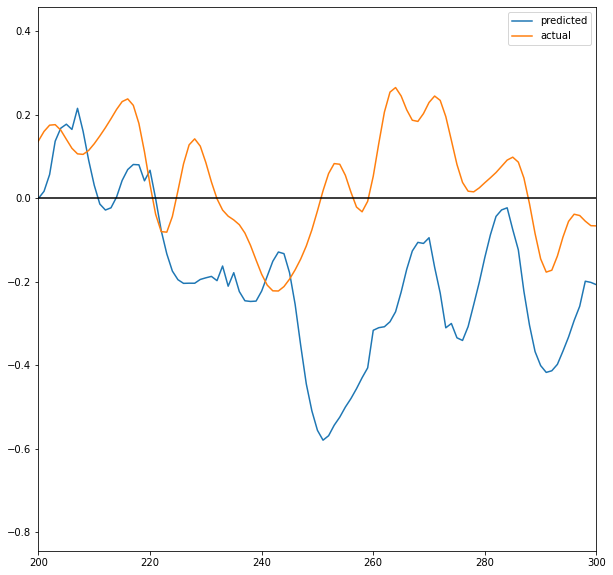

In [13]:
# Plot predicted and actual EEG to the test set
fig = plt.figure(figsize=(10,10))
plt.plot(pred.mean(1)/pred.max(),label='predicted');
plt.plot(vResp.mean(1)/vResp.max(),label='actual');
plt.axhline(0,color='k')
plt.gca().set_xlim([200,300])
plt.legend();

## Classification
_notes from office hours 4/27_

Get some sort of correlation for each of the 10 sentences in our test set, meaning we get a correlation between the predicted response to each of these ten sentences and the actual response.

Next, pick the sentence with the highest correlation. That's your classification

In [14]:
# Split vResp by sn
vResp_by_sn = dict()
for sn in test_set:
    vResp_by_sn[sn] = resp_dict[sn][0].T
for key in vResp_by_sn.keys():
    print(key, vResp_by_sn[key].shape) # samp x chan
# Truncate each sentence so they are all the same length (the length of the shortest sn)
# This is to give each sentence an "equal chance" in classification
min_len = np.min([vResp_by_sn[sn].shape[0] for sn in vResp_by_sn.keys()])
print(f"The shortest sentence is {min_len} samples long")
for key in vResp_by_sn.keys():
    vResp_by_sn[key] = vResp_by_sn[key][:min_len,:]
print("AFTER RESAMPLING:")
for key in vResp_by_sn.keys():
    print(key, vResp_by_sn[key].shape) # samp x chan

fcaj0_si1479.wav (177, 64)
fcaj0_si1804.wav (232, 64)
fdfb0_si1948.wav (206, 64)
fdxw0_si2141.wav (177, 64)
fisb0_si2209.wav (228, 64)
mbbr0_si2315.wav (248, 64)
mdlc2_si2244.wav (194, 64)
mdls0_si998.wav (197, 64)
mjdh0_si1984.wav (172, 64)
mjmm0_si625.wav (303, 64)
The shortest sentence is 172 samples long
AFTER RESAMPLING:
fcaj0_si1479.wav (172, 64)
fcaj0_si1804.wav (172, 64)
fdfb0_si1948.wav (172, 64)
fdxw0_si2141.wav (172, 64)
fisb0_si2209.wav (172, 64)
mbbr0_si2315.wav (172, 64)
mdlc2_si2244.wav (172, 64)
mdls0_si998.wav (172, 64)
mjdh0_si1984.wav (172, 64)
mjmm0_si625.wav (172, 64)


In [15]:
# split vStim by sn
vStim_by_sn = dict()
for sn in test_set:
    vStim_temp = stim_dict[sn][0].T
    vStim_by_sn[sn] = make_delayed(vStim_temp, delays)
min_len = np.min([vStim_by_sn[sn].shape[0] for sn in vStim_by_sn.keys()])
print(f"The shortest sentnce is {min_len} samples long")
for key in vStim_by_sn.keys():
    vStim_by_sn[key] = vStim_by_sn[key][:min_len,:]
print("AFTER RESAMPLING:")
for key in vStim_by_sn.keys():
    print(key, vStim_by_sn[key].shape) # samp x chan

The shortest sentnce is 172 samples long
AFTER RESAMPLING:
fcaj0_si1479.wav (172, 1078)
fcaj0_si1804.wav (172, 1078)
fdfb0_si1948.wav (172, 1078)
fdxw0_si2141.wav (172, 1078)
fisb0_si2209.wav (172, 1078)
mbbr0_si2315.wav (172, 1078)
mdlc2_si2244.wav (172, 1078)
mdls0_si998.wav (172, 1078)
mjdh0_si1984.wav (172, 1078)
mjmm0_si625.wav (172, 1078)


In [23]:
for i in correlations:
    correlations[i,:]

array([0.19070526, 0.26876866, 0.01816308, 0.2790266 , 0.07938116,
       0.3045408 , 0.14722832, 0.08296358, 0.18397703, 0.20439909])

Calculating prediction...
Calculating correlation
fcaj0_si1479.wav
fcaj0_si1479.wav
0.1907052620814469
Calculating prediction...
Calculating correlation
fcaj0_si1479.wav
fcaj0_si1804.wav
0.2687686598321597
Calculating prediction...
Calculating correlation
fcaj0_si1479.wav
fdfb0_si1948.wav
0.018163075584917376
Calculating prediction...
Calculating correlation
fcaj0_si1479.wav
fdxw0_si2141.wav
0.2790265975018523
Calculating prediction...
Calculating correlation
fcaj0_si1479.wav
fisb0_si2209.wav
0.07938115696685777
Calculating prediction...
Calculating correlation
fcaj0_si1479.wav
mbbr0_si2315.wav
0.30454079541064627
Calculating prediction...
Calculating correlation
fcaj0_si1479.wav
mdlc2_si2244.wav
0.14722832314999373
Calculating prediction...
Calculating correlation
fcaj0_si1479.wav
mdls0_si998.wav
0.08296357870389555
Calculating prediction...
Calculating correlation
fcaj0_si1479.wav
mjdh0_si1984.wav
0.18397702588918846
Calculating prediction...
Calculating correlation
fcaj0_si1479.wav


Calculating correlation
mjdh0_si1984.wav
mjdh0_si1984.wav
0.15045395505475206
Calculating prediction...
Calculating correlation
mjdh0_si1984.wav
mjmm0_si625.wav
0.33205729616738383
Calculating prediction...
Calculating correlation
mjmm0_si625.wav
fcaj0_si1479.wav
0.15120711981716678
Calculating prediction...
Calculating correlation
mjmm0_si625.wav
fcaj0_si1804.wav
0.030971860815405216
Calculating prediction...
Calculating correlation
mjmm0_si625.wav
fdfb0_si1948.wav
-0.08430414229645362
Calculating prediction...
Calculating correlation
mjmm0_si625.wav
fdxw0_si2141.wav
0.24649591103671503
Calculating prediction...
Calculating correlation
mjmm0_si625.wav
fisb0_si2209.wav
0.09866422999417127
Calculating prediction...
Calculating correlation
mjmm0_si625.wav
mbbr0_si2315.wav
-0.08897450411742455
Calculating prediction...
Calculating correlation
mjmm0_si625.wav
mdlc2_si2244.wav
0.12515060925852234
Calculating prediction...
Calculating correlation
mjmm0_si625.wav
mdls0_si998.wav
-0.0042755673

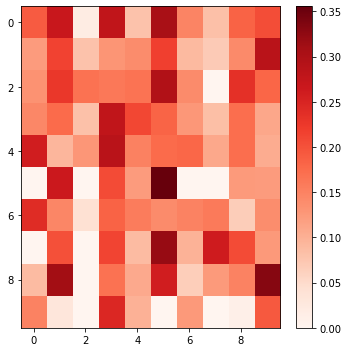

In [26]:
fig = plt.figure(figsize=(5,5))
correlations = np.zeros((len(test_set),len(test_set)))
predictions = np.zeros((len(test_set),len(test_set)))

for i,key1 in enumerate(test_set):
    for ii,key2 in enumerate(test_set):
        comparison = f'{key1}-{key2}'
        correlations[i,ii] = predict_response(
            weights, vStim_by_sn[key1], vResp_by_sn[key2])[0].mean()
        print(key1)
        print(key2)
        print(correlations[i,ii])
#     print(key, corr_by_sn[key].mean())

plt.imshow(correlations,vmin=0,vmax=correlations.max(),aspect='auto',cmap=cm.Reds);
plt.colorbar();
plt.tight_layout();


# highest_corr = np.max([corr_by_sn[key].mean() for key in corr_by_sn.keys()])

# classified_sn = [key for key in corr_by_sn.keys() if corr_by_sn[key].mean() == highest_corr][0]

# print(f'The predicted sentence is {classified_sn} with a correlation of {highest_corr}.')

## Post-office hours ideas
* Instead of averaging across all electrodes, only avg across elecs that had significant corr values in the TRAIN set (this should be in Maansi's h5 files)
* Instead of averaging across all electrodes, make an 8x8 subplot showing correlations at individual elecs. (Make sure they all have the same vmax)
* Somehow indicate which sentence is decoded in the `plt.imshow()` plot (Basically mark the max in each column).
* Repeat this process across all subjects, giving us within-subject classification metrics